In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, \
    classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


In [16]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df['target'].unique()

array([1, 0])

**Анализ данных и визуализация**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

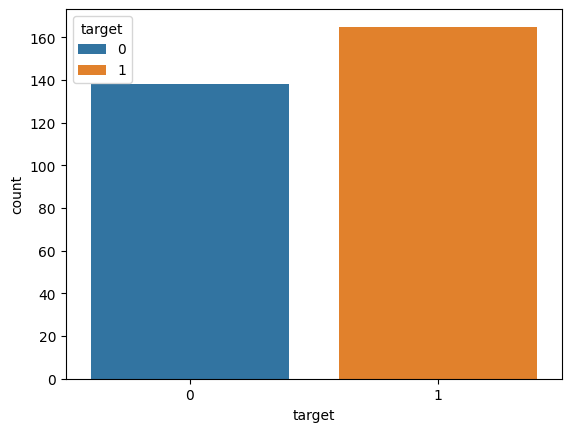

In [20]:
sns.countplot(data=df, x='target',hue='target')

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**ЗАДАНИЕ: Нарисуйте график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

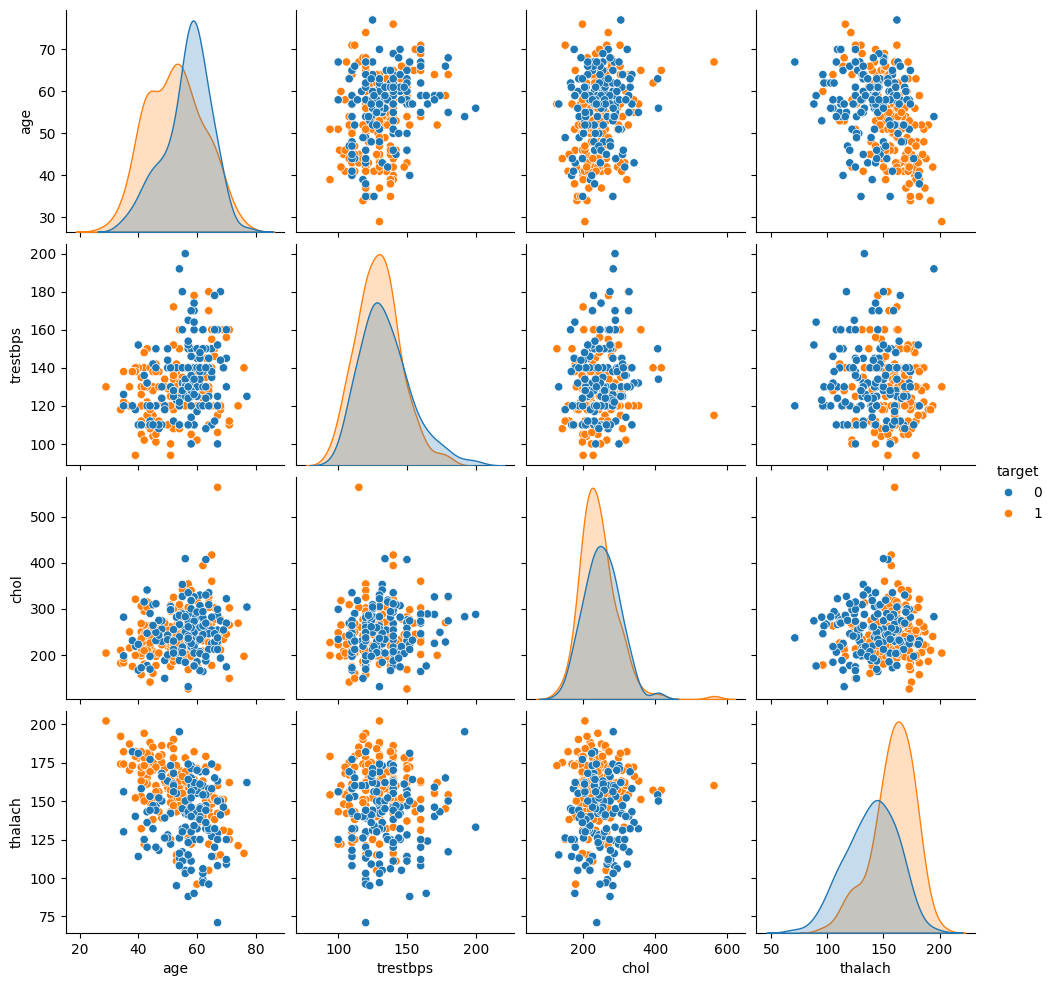

In [22]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target') # проблема у меня была в том, что нужно задавать было hue для таргета
# нужно делать разделение по целевой переменной

<Axes: >

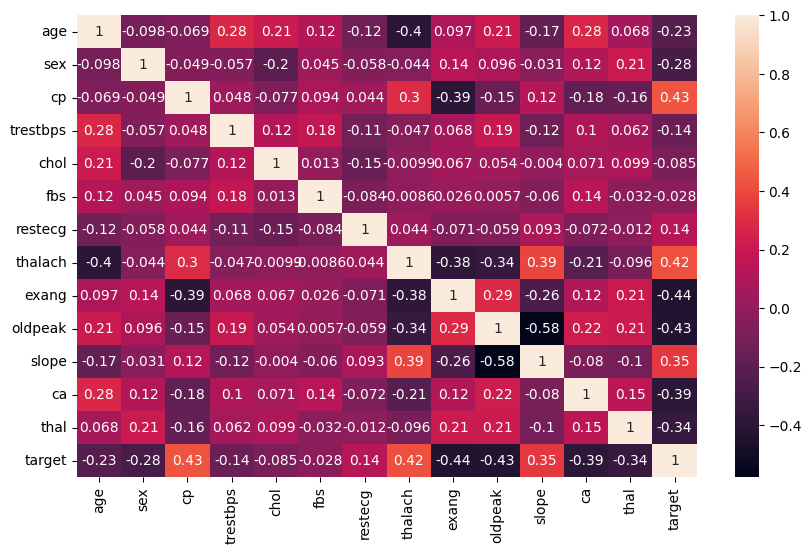

In [23]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot= True)

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**ЗАДАНИЕ: разделите все признаки на 2 объекта, X и y.**

In [25]:
X = df.drop('target', axis=1)
y = df['target']

**ЗАДАНИЕ: разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [28]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**ЗАДАНИЕ: Создайте модель логистической регрессии, и с помощью кросс-валидации найдите хорошее значение значение C. У Вас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Выбор за Вами. В блокноте с решениями мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [33]:
log_model = LogisticRegressionCV(cv=5)

In [34]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(cv=5)

In [36]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

**БОНУСНОЕ ЗАДАНИЕ: Мы не показывали это в блокноте лекции, но у Вас есть все навыки, чтобы сделать это! Сделайте визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно можете попробовать выяснить, как отсортировать график! Если что-то будет не получаться, то смело заглядывайте в блокнот с решениями - это можно сделать разными способами, в нашем решении мы используем комбинацию pandas и seaborn.**

In [39]:
log_model.coef_[0]

array([-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
        0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
        0.25100118, -0.49732614, -0.37440968])

In [43]:
features = df.drop('target', axis=1).columns
coefs = log_model.coef_[0]

In [ ]:
# решение через списки
a = zip(features, coefs)
features = []
coefs = []
for f, c in sorted(a, key=lambda x: x[1]):
    features.append(f)
    coefs.append(c)

<Axes: >

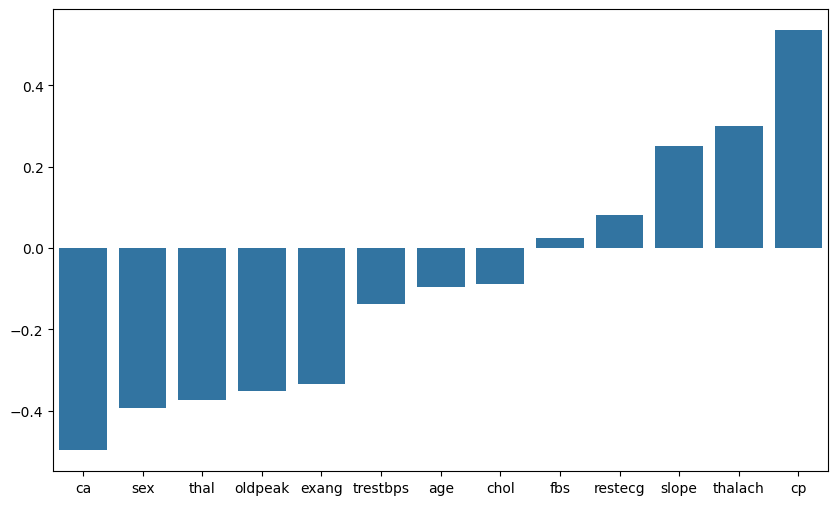

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=features, y=coefs)

In [ ]:
# можно решить иначе, через пандавскую серию
# в качестве индекса признаки
# в качестве данных коэффициенты модели
coef = pd.Series(index=df.drop('target', axis=1).columns, data = log_model.coef_[0])
coef

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
fbs         0.024956
restecg     0.080830
thalach     0.298969
exang      -0.334400
oldpeak    -0.352528
slope       0.251001
ca         -0.497326
thal       -0.374410
dtype: float64

In [75]:
data1 = coef.sort_values()
data1.values

array([-0.49732614, -0.39455733, -0.37440968, -0.35252781, -0.33440044,
       -0.13845013, -0.09624234, -0.0882132 ,  0.02495565,  0.08083019,
        0.25100118,  0.29896895,  0.53541263])

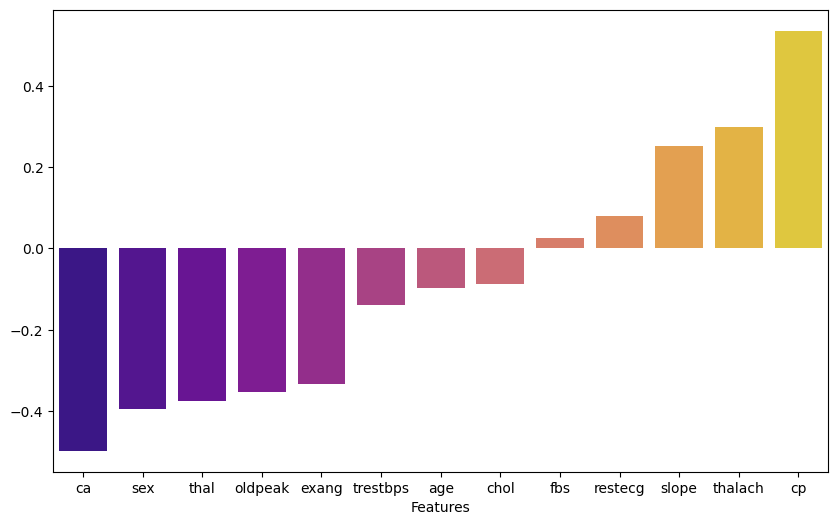

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Features')
sns.barplot(x= data1.index, y=data1.values, hue=data1.index, palette='plasma');

---------

## Оценка модели

**ЗАДАНИЕ: Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [80]:
y_pred = log_model.predict(scaled_X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



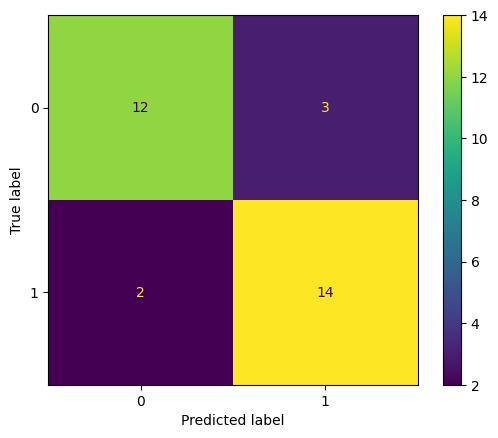

In [83]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

### Кривые производительности

**ЗАДАНИЕ: Нарисуйте графики "precision recall curve" и "ROC Curve".**

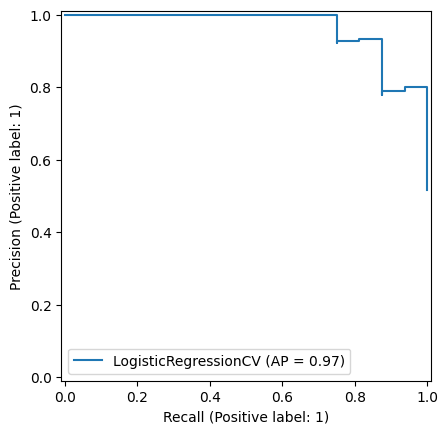

In [86]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

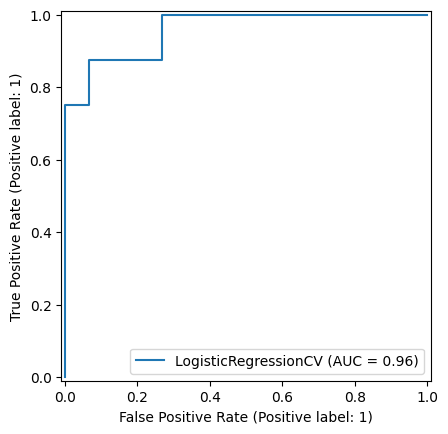

In [87]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

**ЗАДАНИЕ: Что предскажет Ваша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

In [ ]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]] # именно две пары скобок

In [ ]:
log_model.predict(patient) # получили, что пациент с такими признаками не болеет

array([0])